### Problem Statement
we are going to work on the 'Systemic Crisis, Banking Crisis, inflation Crisis In Africa' dataset that was provided by Kaggle.
The ML model objective is to predict the likelihood of a Systemic crisis emergence given a set of indicators like the annual inflation rates.

In [1]:
# import all necessary libraries
import numpy as np
import pandas as pd

# for visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder

# ggplot style sheet
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read and import file
df = pd.read_csv("African_crises_dataset.csv")
df

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


### Data Inspection

In [3]:
# shape of data
df.shape

(1059, 14)

In [4]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [5]:
# check for duplicates
df.duplicated().sum()

0

In [6]:
# check for missing values
df.isnull().sum()

country_number                     0
country_code                       0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

*There are no missing values*

In [7]:
# extract the numerical columns from the dataset
num_vars = df.select_dtypes(include=['int64', 'float64'])

# confirm if there are negative for each columns
num_vars_negative = (num_vars < 0).sum()

print(num_vars_negative)

country_number                       0
year                                 0
systemic_crisis                      0
exch_usd                             0
domestic_debt_in_default             0
sovereign_external_debt_default      0
gdp_weighted_default                 0
inflation_annual_cpi               131
independence                         0
currency_crises                      0
inflation_crises                     0
dtype: int64


*There are negative values for the inflation_annual_cpi, and since it's not abnormal for it to have negative vales we would work with it.*         

country_number                       0
year                                42
systemic_crisis                     82
exch_usd                           214
domestic_debt_in_default            42
sovereign_external_debt_default    162
gdp_weighted_default                30
inflation_annual_cpi               108
independence                       237
currency_crises                    136
inflation_crises                   137
dtype: int64


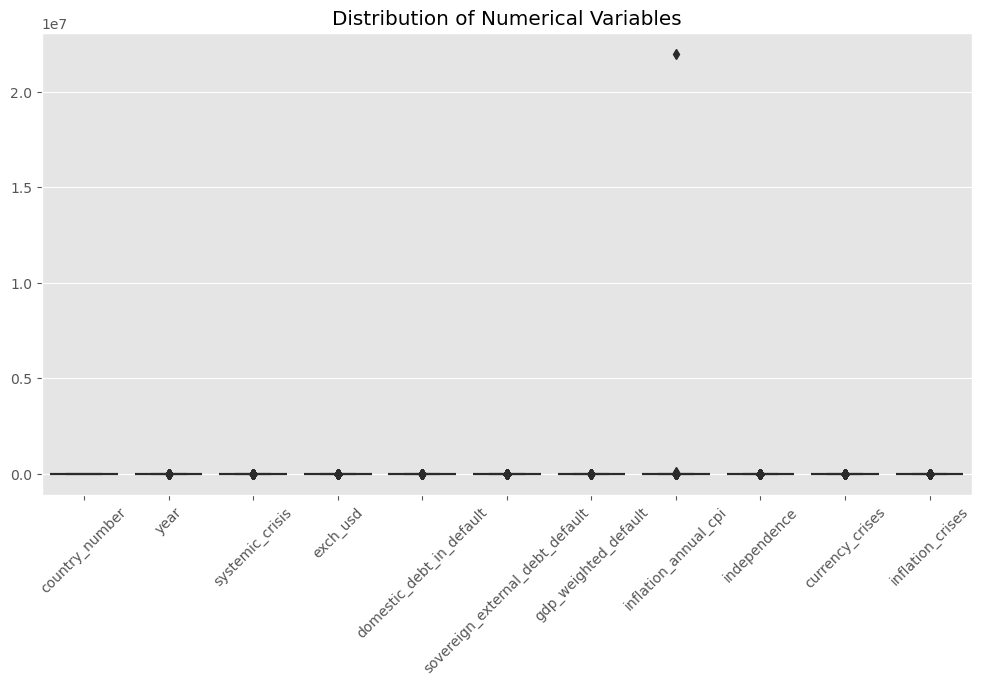

In [8]:
# Extract the numerical columns from the dataset
num_vars = df.select_dtypes(include=['int64', 'float64'])

# Calculate the number of outliers for each numerical variable
outliers_count = ((num_vars < num_vars.quantile(0.25) - 1.5 * (num_vars.quantile(0.75) - num_vars.quantile(0.25))) |
                  (num_vars > num_vars.quantile(0.75) + 1.5 * (num_vars.quantile(0.75) - num_vars.quantile(0.25))))
outliers_count = outliers_count.sum()

# Display the number of outliers in a table
print(outliers_count)

# Create a boxplot to show the distribution of each numerical variable
plt.figure(figsize=(12, 6))
sns.boxplot(data=num_vars, palette='viridis')
plt.title('Distribution of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

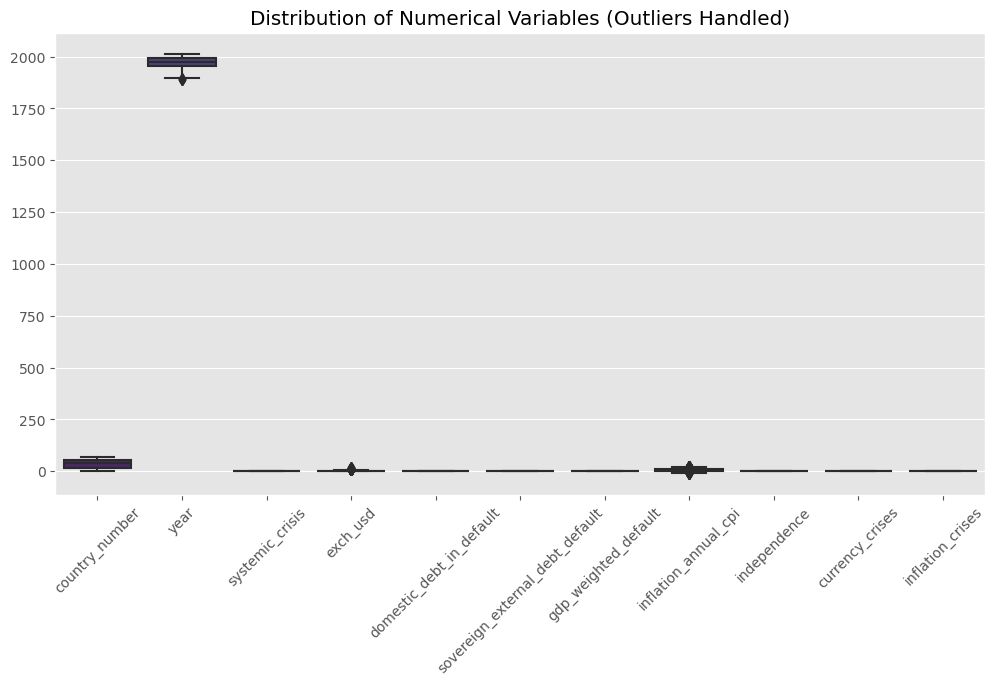

In [9]:
# Calculate the median of each numerical variable
medians = num_vars.median()

# Replace outliers with the median of each variable
for column in num_vars.columns:
    q1 = num_vars[column].quantile(0.25)
    q3 = num_vars[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    num_vars[column] = num_vars[column].apply(lambda x: medians[column] if x < lower_bound or x > upper_bound else x)

# Create a boxplot to show the distribution of each numerical variable after handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=num_vars, palette='viridis')
plt.title('Distribution of Numerical Variables (Outliers Handled)')
plt.xticks(rotation=45)
plt.show()


### Data Transformation

In [10]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Apply label encoding to multiple columns
for column in ['country', 'banking_crisis']:
    df[column] = encoder.fit_transform(df[column])
    
# Display the result
df


,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,0
1,1,DZA,0,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,1
2,1,DZA,0,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,1,DZA,0,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,1
4,1,DZA,0,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,12,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,0
1055,70,ZWE,12,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,1
1056,70,ZWE,12,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,1
1057,70,ZWE,12,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,1


In [2]:
from ydata_profiling import ProfileReport

Profile = ProfileReport(df, title = "African_crises")

Profile.to_notebook_iframe()

ModuleNotFoundError: No module named 'ydata_profiling'

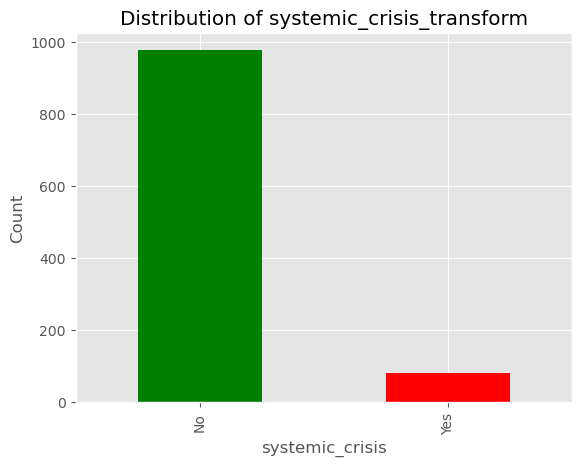

In [11]:
# Convert the 'systemic_crisis' to 'Yes' and 'No' in a new column 'systemic_crisis_transform'
df['systemic_crisis_transform'] = df['systemic_crisis'].map({1: 'Yes', 0: 'No'})

# Plot the distribution of 'Yes' and 'No'
df['systemic_crisis_transform'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.xlabel('systemic_crisis')
plt.ylabel('Count')
plt.title('Distribution of systemic_crisis_transform')
plt.show()

In [14]:
df

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis,systemic_crisis_transform
0,1,DZA,0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,0,Yes
1,1,DZA,0,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,1,No
2,1,DZA,0,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,1,No
3,1,DZA,0,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,1,No
4,1,DZA,0,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,12,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,0,Yes
1055,70,ZWE,12,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,1,No
1056,70,ZWE,12,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,1,No
1057,70,ZWE,12,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,1,No


### Multivariate Analysis

In [1]:
# Create a scatterplot matrix using Seaborn
sns.pairplot(df.select_dtypes(include = ['int', 'float']))

# Calculate the correlation coefficients
correlation_matrix = df.select_dtypes(include = ['int', 'float']).corr()

# Display the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Coefficients')
plt.show()

NameError: name 'sns' is not defined

### Feature Selection

### Drop Unnecessary Columns not Crucial to Objective

In [29]:
columns_to_drop = ['country_number', 'country_code', 'systemic_crisis_transform']

# Option 1: Using the drop() method
Used_df = df.drop(columns=columns_to_drop)
Used_df

,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,0
1,0,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,1
2,0,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,0,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,1
4,0,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1054,12,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,0
1055,12,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,1
1056,12,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,1
1057,12,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,1


In [30]:
# Select the target variable y
y = Used_df['systemic_crisis']

# Drop the target variable and create the independent variables
X = Used_df.drop('systemic_crisis', axis=1)


In [31]:
X.head()

,country,year,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,0,1870,0.052264,0,0,0.0,3.441456,0,0,0,0
1,0,1871,0.052798,0,0,0.0,14.149140,0,0,0,1
2,0,1872,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,0,1873,0.051680,0,0,0.0,11.203897,0,0,0,1
4,0,1874,0.051308,0,0,0.0,-3.848561,0,0,0,1


In [27]:
# value count of the target y
y.value_counts()

systemic_crisis
0    977
1     82
Name: count, dtype: int64

# Oversampling using SMOTE (Synthetic Minority Over-sampling Technique)

In [18]:
pip install -U imbalanced-learn


   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/257.7 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/257.7 kB ? eta -:--:--
   ------------- ------------------------- 92.2/257.7 kB 438.1 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/257.7 kB 438.1 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/257.7 kB 438.1 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/257.7 kB 438.1 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/257.7 kB 438.1 kB/s eta 0:00:01
   ---------------------- --------------- 153.6/257.7 kB 340.5 kB/s eta 0:00:01
   ---------------------- --------------- 153.6/257.7 kB 340.5 kB/s eta 0:00:01
   ------------------------- ------------ 174.1/257.7 kB 291.5 kB/s eta 0:00:01
   ------------------------------ ------- 204.8/257.7 kB 328.1 kB/s eta 0:00:01
   -------------------------------------  256.0/257.7 kB 374.6 k

In [32]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resampled the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution before and after resampling
print('Class distribution before resampling: {}'.format(Counter(y)))
print('Class distribution after resampling: {}'.format(Counter(y_resampled)))

Class distribution before resampling: Counter({0: 977, 1: 82})
Class distribution after resampling: Counter({1: 977, 0: 977})


# Train-Test-Split
Split the dataset into training and testing sets. We will allocate a certain percentage of 80-20 for training and testing, respectively. This will be done using the train_test_split function from scikit-learn.

In [33]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scaling of Data

# MinMax Scaler

In [34]:
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training features
scaler.fit(X_train)

# Transform the training and test features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection
The following algortihms for the model selection include:

Logistic Regression

Decision Tree

Support Vector Machine

K-Nearest Neighbor

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics

# for hyperparameter tuning using k-fold cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict

# Model Training

Import the necessary libraries for each algorithms

create an instance of each model

fit the models to the training data using the fit method

# Logistic Regression

In [36]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

In [37]:
from sklearn.metrics import accuracy_score
# create predictions
y_pred = lr_model.predict(X_test_scaled)

# print accuracy score for Logistic Regression
print(f'The accuracy of the logistic regression is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the logistic regression is 97.2 %


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and return a dictionary of performance metrics for a binary classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Create a dictionary of results
    results = {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    return results

lr_result = metrics_calculator(y_test, y_pred, 'lr_model')
lr_result

{'Model': 'lr_model',
 'Accuracy': 0.9718670076726342,
 'Precision': 0.9842105263157894,
 'Recall': 0.958974358974359,
 'F1-Score': 0.9714285714285715}

# Decision Tree

In [39]:
# Create an instance of DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Fit the model on the scaled training
dt_model.fit(X_train_scaled, y_train)
dt_probs = dt_model.predict_proba(X_test_scaled)[:, 1]

In [40]:
# Predict the classes of the testing data
y_pred = dt_model.predict(X_test_scaled)

# print accuracy score for DecisionTree Classifier
print(f'The accuracy of the DecisionTree is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the DecisionTree is 99.0 %


In [41]:
dt_result = metrics_calculator(y_test, y_pred, 'dt_model')
dt_result

{'Model': 'dt_model',
 'Accuracy': 0.989769820971867,
 'Precision': 0.9948186528497409,
 'Recall': 0.9846153846153847,
 'F1-Score': 0.9896907216494846}

# Support Vector Machine

In [42]:
# Create an instance of Support vector machine
svm_model = SVC(probability=True)

# Fit the model on the scaled training
svm_model.fit(X_train_scaled, y_train)
svm_probs = svm_model.predict_proba(X_test_scaled)[:, 1]

In [43]:
# Predict the classes of the testing data
y_pred = svm_model.predict(X_test_scaled)

# print accuracy score for SVM
print(f'The accuracy of the SVM is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the SVM is 97.2 %


In [44]:
svm_result = metrics_calculator(y_test, y_pred, 'svm_model')
svm_result

{'Model': 'svm_model',
 'Accuracy': 0.9718670076726342,
 'Precision': 0.9842105263157894,
 'Recall': 0.958974358974359,
 'F1-Score': 0.9714285714285715}

# K-Nearest Neighbour

In [45]:
# Create an instance of K-Nearest Neighbour
knn_model = KNeighborsClassifier()

# Fit the model on the scaled training
knn_model.fit(X_train_scaled, y_train)
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]

In [46]:
# Predict the classes of the testing data
y_pred = knn_model.predict(X_test_scaled)

# print accuracy score for K-Nearest Neigbour
print(f'The accuracy of the KNN is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the KNN is 98.7 %


In [47]:
knn_result = metrics_calculator(y_test, y_pred, 'knn_model')
knn_result

{'Model': 'knn_model',
 'Accuracy': 0.9872122762148338,
 'Precision': 0.9797979797979798,
 'Recall': 0.9948717948717949,
 'F1-Score': 0.9872773536895675}

# Model Evaluation
Evaluate the models using classification reports and confusion matrices.

Logistic Regression Classification Report:
                    precision    recall  f1-score   support

No-systemic_crisis      0.960     0.985     0.972       196
   systemic_crisis      0.984     0.959     0.971       195

          accuracy                          0.972       391
         macro avg      0.972     0.972     0.972       391
      weighted avg      0.972     0.972     0.972       391



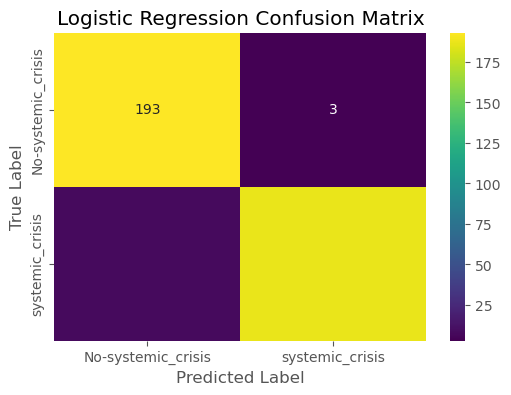

Decision Tree Classification Report:
                    precision    recall  f1-score   support

No-systemic_crisis      0.985     0.995     0.990       196
   systemic_crisis      0.995     0.985     0.990       195

          accuracy                          0.990       391
         macro avg      0.990     0.990     0.990       391
      weighted avg      0.990     0.990     0.990       391



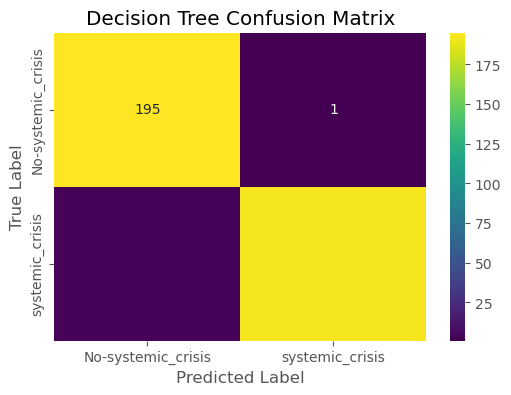

SVM Classification Report:
                    precision    recall  f1-score   support

No-systemic_crisis      0.960     0.985     0.972       196
   systemic_crisis      0.984     0.959     0.971       195

          accuracy                          0.972       391
         macro avg      0.972     0.972     0.972       391
      weighted avg      0.972     0.972     0.972       391



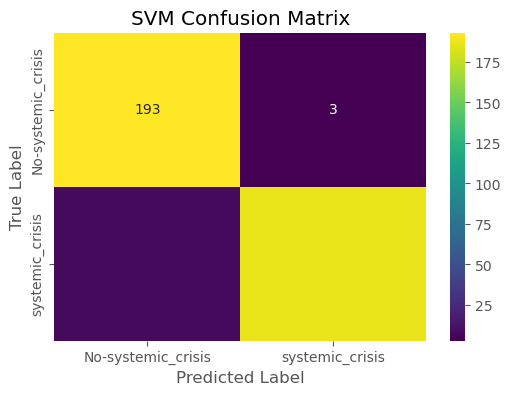

KNN Classification Report:
                    precision    recall  f1-score   support

No-systemic_crisis      0.995     0.980     0.987       196
   systemic_crisis      0.980     0.995     0.987       195

          accuracy                          0.987       391
         macro avg      0.987     0.987     0.987       391
      weighted avg      0.987     0.987     0.987       391



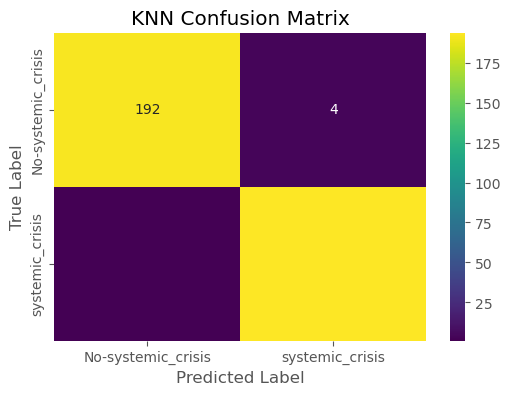

In [49]:
from sklearn.metrics import confusion_matrix, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt

# Create a list of models and their corresponding names
models = [lr_model, dt_model, svm_model, knn_model]
model_names = ['Logistic Regression', 'Decision Tree', 'SVM', 'KNN']

# Set the labels
labels = ['No-systemic_crisis', 'systemic_crisis']

# Set the desired number of decimal places
decimal_places = 3

# Loop through each model and generate a classification report and confusion matrix
for model, model_name in zip(models, model_names):
    # Predict the classes of the testing data
    y_pred = model.predict(X_test_scaled)
    
    # Generate the classification report with the specified number of decimal places
    report = classification_report(y_test, y_pred, target_names=labels, digits=decimal_places)
    print(f'{model_name} Classification Report:\n{report}')
    
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt='d', xticklabels=labels, yticklabels=labels)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [ ]:
# Concatenate results into a single dataframe all the model metric calculator results
results_df = pd.DataFrame([lr_result, dt_result, svm_result, knn_result])

results_df

In [ ]:
# Set the figure size
plt.figure(figsize=(20, 8))

# Set the width of the bars
bar_width = 0.2

# Create a bar chart of the metrics for each model
models = results_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(models)) + i * bar_width, results_df[metric], width=bar_width, color=colors[i], label=metric)
    for j, value in enumerate(results_df[metric]):
        plt.text(j + i * bar_width - 0.05, value + 0.01, '{:.2f}'.format(value))

# Add labels and legend
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics by Model')
plt.xticks(np.arange(len(models)) + bar_width / 2, models)
plt.legend()

# Show the chart
plt.show()


* when predicting the outcome of a  systemic_crisis , where 1 represents systemic_crisis and 0 represent no systemic_crisis, We want to pay attention to precision and recall, as well as the f1-score of the loan defaulted class.

Precision(positive prediction value): It measures the positive predictions made by the model. In this context osystemic_crisised prediction, it represent the percentage of predictesystemic_crisised cases that ar aactuasystemic_crisised. High precision is important because you want to minimize false positives.

Hence, from the confusion of the models, we discover that the Decision Tree 99.580.7% compared to other models, it means that it has correctly identified moresystemic_crisislted(true positives) while minimizing false positive.

Recall(sensitivity): it measures the ability of the model to correctly identified all actual orsystemic_crisisaulted cases. It represent a percentage of of actual orsystemic_crisis ulted that are correctly identified by the model. Thus, for the Decision Tree, it has a reca98.5 of 76% osystemic_crisiseaulted compared to other models.

F1-score: it is the harmonic mean of precision and recall. it provides a balance measure of both precision and recsystemic_crisisn status predicition, we want to generally strike a balance between correctly idensystemic_crisisefaulted cases(recall) and minimizing false positives(precision). Thus, the f1-score help us to evaluate the trade-off between these two  *metrics.

# Summary
The  Decision Tree is the best performing model with an accuracy of 98.9%, precision of 99.5% , a recall of 98.5% and f1-score of 98.9% for the systemic_crisis cases based on the evaluation metrics.

In [50]:
# Concatenate results into a single dataframe all the model metric calculator results
results_df = pd.DataFrame([lr_result, dt_result, svm_result, knn_result])

results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,lr_model,0.971867,0.984211,0.958974,0.971429
1,dt_model,0.989770,0.994819,0.984615,0.989691
2,svm_model,0.971867,0.984211,0.958974,0.971429
3,knn_model,0.987212,0.979798,0.994872,0.987277


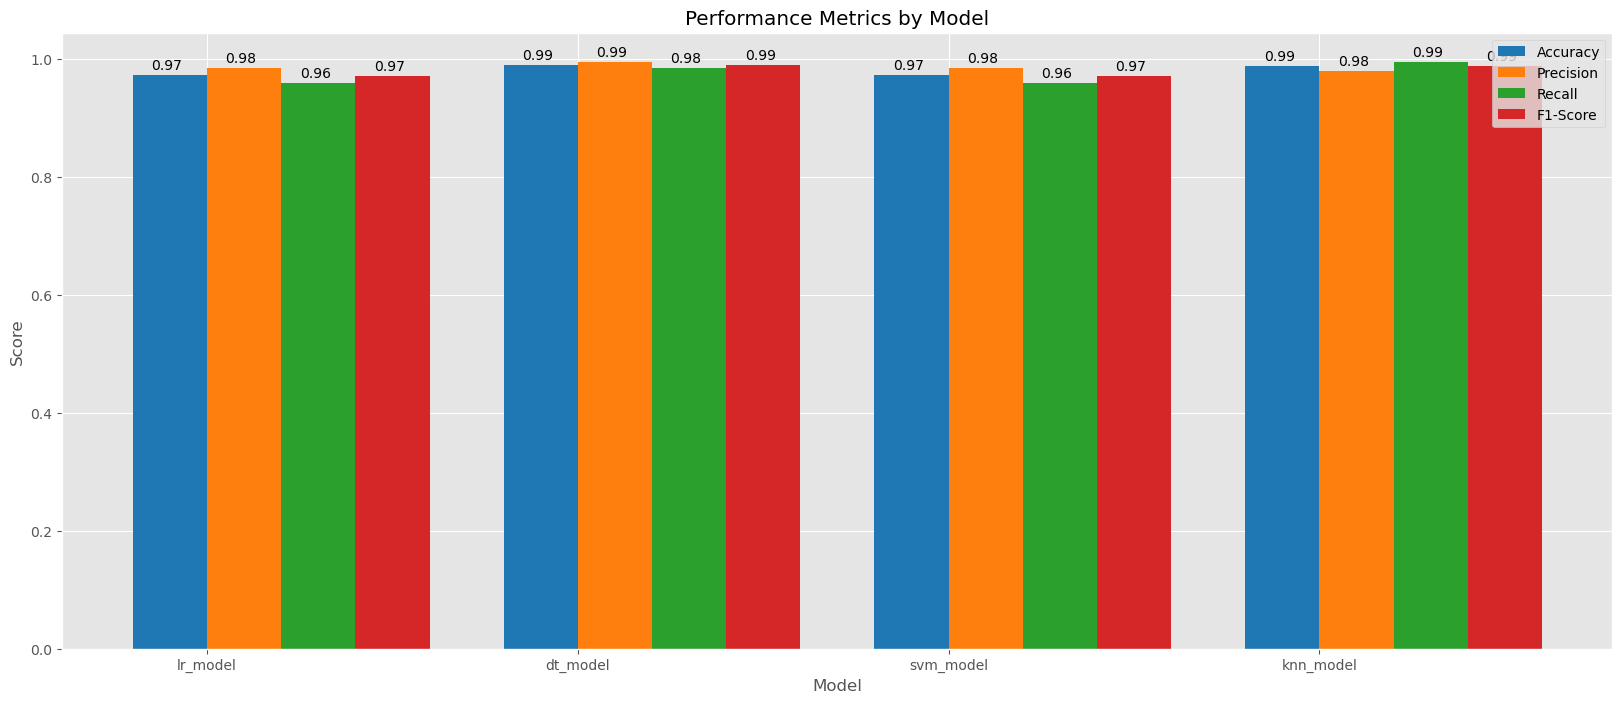

In [51]:
# Set the figure size
plt.figure(figsize=(20, 8))

# Set the width of the bars
bar_width = 0.2

# Create a bar chart of the metrics for each model
models = results_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(models)) + i * bar_width, results_df[metric], width=bar_width, color=colors[i], label=metric)
    for j, value in enumerate(results_df[metric]):
        plt.text(j + i * bar_width - 0.05, value + 0.01, '{:.2f}'.format(value))

# Add labels and legend
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics by Model')
plt.xticks(np.arange(len(models)) + bar_width / 2, models)
plt.legend()

# Show the chart
plt.show()

*It is seen that Decision Tree provides the balance measure between correctly identifying systemic_crisis case(recall) with a percentage of 98.5% and minimizing false positive(precision) with a percentage of 99.5%. It has a higher accuracy of 98.9%, for predicting the systemic_crisis.*

# AUC-ROC
The AUC-ROC scores of the models to their accuracy score and confusion matrices can be used to get a complete picture of each model's performance. The AUC-ROC score measures the overall performance of a binary classifier, taking into account bith true positive rate and false positive rate. The higher the AUC-ROC score, the better the model's ability to distinguish between positive and negative classes. Therefore, a model with a higher AUC-ROC score is generally considered to be better than a model with a lower score.

In [52]:
# Calculate the AUC-ROC for logistic regression
lr_auc = roc_auc_score(y_test, lr_probs)

# Calculate the AUC-ROC for decision tree
dt_auc = roc_auc_score(y_test, dt_probs)

# Calculate the AUC-ROC for svc
svm_auc = roc_auc_score(y_test, svm_probs)

# Calculate the AUC-ROC for KNN
knn_auc = roc_auc_score(y_test, knn_probs)

# Print the AUC-ROC scores
print(f'Logistic Regression AUC-ROC: {lr_auc:.2f}')
print(f'Decision Tree AUC-ROC: {dt_auc:.2f}')
print(f'Support Vector Machine AUC-ROC: {svm_auc:.2f}')
print(f'K-Nearest Neighbor AUC-ROC: {knn_auc:.2f}')

Logistic Regression AUC-ROC: 0.99
Decision Tree AUC-ROC: 0.99
Support Vector Machine AUC-ROC: 0.99
K-Nearest Neighbor AUC-ROC: 0.99


*It is observed that they all have an AUC-ROC score of 99%*

# Feature Engineering
After training the best performing model which is Decision Tree model, We will analyze feature importance. For example, we will use Random Forest Classifier model to check feature importance.

Random Forest classifier is often used for feature importances because it has several advantages over other model classifiers in this context.

While Random Forest is commonly used for feature importances, other model classifiers such as Gradient Boosting Machines and XGBoost also provide feature importance scores. However, Random Forest remains popular for this purpose due to its ease of use, robustness, and ability to handle a wide range of data characteristics.

In [53]:
# Feature importances using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier()

# Fit the classifier to your training data
rf_classifier.fit(X_train_scaled, y_train)

# Get feature importances from the trained classifier
feature_importances = rf_classifier.feature_importances_

# Display feature importances alongside feature names
feature_names = X.columns
feature_importances_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)


for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance:.2f}')

banking_crisis: 0.58
year: 0.20
exch_usd: 0.10
country: 0.05
independence: 0.02
inflation_annual_cpi: 0.02
sovereign_external_debt_default: 0.01
inflation_crises: 0.01
gdp_weighted_default: 0.01
currency_crises: 0.00
domestic_debt_in_default: 0.00


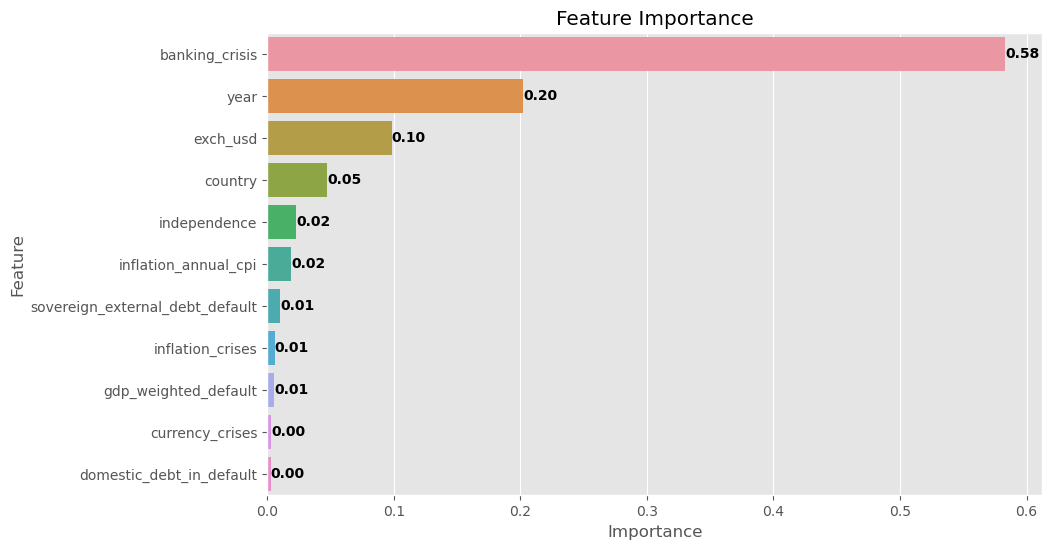

In [54]:
# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Annotate the bars with the importance values
for i, v in enumerate(feature_importance_df['Importance']):
    ax.text(v, i, f'{v:.2f}', color='black', va='center', fontsize=10, fontweight='bold')

plt.show()

*The feature importances of systemic_crisis prediction using random forest, based on their importance scores from the chart. It shows that banking crisis , followed by Year, exch_usd and Country are the major predictors.*

# A Bit of Features Selection
We will use the following features; banking crisis , followed by Year,exch_usd, Country, and inflation_annual_cpi Term to retrain the Decision Tree model.

In [56]:
# split into training and validation set using 30-70 split ratio
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.3)

X_train2 = X_train[['banking_crisis', 'year', 'exch_usd', 'country', 'inflation_annual_cpi']]
X_valid2 = X_valid[['banking_crisis', 'year', 'exch_usd', 'country', 'inflation_annual_cpi']]

In [57]:
# Since Decision Tree model is the best performing model

# fit the model on the new training set
dt_model.fit(X_train2, y_train)

# predit on the new testing set
y_valid2_pred = dt_model.predict(X_valid2)

In [58]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid2_pred, y_valid)
print(f'Accuracy Score: {accuracy:.2f}')

Accuracy Score: 0.99


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_valid2_pred, y_valid)
print(f'Accuracy Score: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_valid2_pred, y_valid)
print(f'Precision Score: {precision:.2f}')

# Calculate recall
recall = recall_score(y_valid2_pred, y_valid)
print(f'Recall Score: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_valid2_pred, y_valid)
print(f'F1-score: {f1:.2f}')


Accuracy Score: 0.99
Precision Score: 0.99
Recall Score: 0.99
F1-score: 0.99
